In [131]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [132]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [133]:
# 레이블 데이터
# 0 T-shirt/top
# 1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot

In [134]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [135]:
np.random.seed(2022)
sample = 3

idxes = np.random.randint(60000, size=sample)
idxes

array([21373,  1244, 16557])

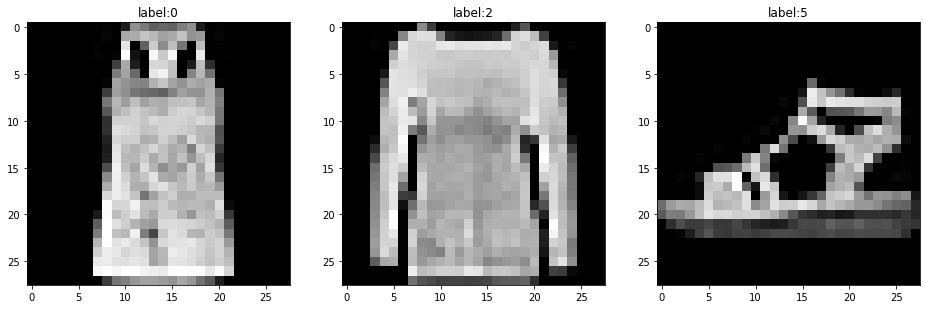

In [136]:
plt.figure(figsize = (16, 7))
for i in range(len(idxes)):
  img = X_train[idxes[i]]
  label = y_train[idxes[i]]

  ax = plt.subplot(1, sample, i+1)
  ax.set_title('label:' + str(label))
  ax.imshow(img, cmap = 'gray')

plt.show()

In [137]:
# val 데이터 나누기

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 20)
X_train.shape, X_val.shape

((48000, 28, 28), (12000, 28, 28))

In [138]:
# X 데이터 차원 축소

X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape, X_val.shape, X_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [139]:
np.max(X_train), np.min(X_train)

(255, 0)

In [140]:
# X 데이터 minmax scaling

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [141]:
# 데이터 원 핫 인코딩

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [142]:
# 모델 만들기

model = keras.Sequential([
    layers.Dense(256, input_shape = (784,), activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               200960    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 10)                170       
                                                                 
Total params: 244,890
Trainable params: 244,890
Non-tr

In [143]:
# 모델 컴파일
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.002)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = 'acc')


In [144]:
# 모델 학습
EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val))

Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 0.5763 - acc: 0.7977 - val_loss: 0.4461 - val_acc: 0.8434
Epoch 2/30
750/750 [==============================] - 3s 5ms/step - loss: 0.3995 - acc: 0.8549 - val_loss: 0.4616 - val_acc: 0.8342
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3613 - acc: 0.8672 - val_loss: 0.3666 - val_acc: 0.8633
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3402 - acc: 0.8739 - val_loss: 0.3698 - val_acc: 0.8631
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3261 - acc: 0.8800 - val_loss: 0.3325 - val_acc: 0.8738
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3027 - acc: 0.8890 - val_loss: 0.3162 - val_acc: 0.8847
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 0.2942 - acc: 0.8916 - val_loss: 0.3167 - val_acc: 0.8816
Epoch 8/30
750/750 [==============================] - 4s 5ms/step - loss: 0.

In [145]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

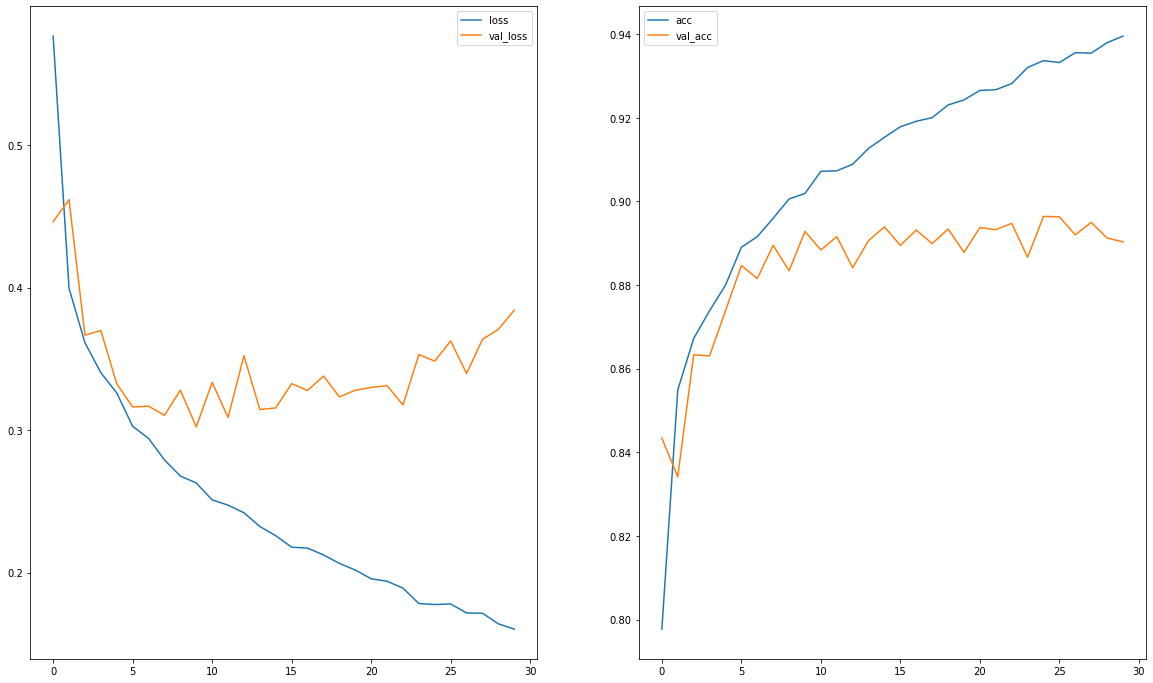

In [146]:
plot_history(history)

In [147]:
# 모델 평가

model.evaluate(X_test,to_categorical(y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.4344 - acc: 0.8810


[0.4344208538532257, 0.8809999823570251]

In [148]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1) # 제일 높은 값 가져오기
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.881

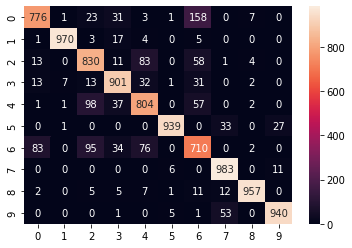

In [149]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True, fmt = 'd')